In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Importing the important modules and the training Data 

In [2]:
import keras
from keras.datasets import mnist
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print(f"Train images {x_train.shape} \n Test image {x_test.shape}")

Train images (60000, 28, 28) 
 Test image (10000, 28, 28)


In [5]:
(number,counts) = np.unique(y_train, return_counts = True)
print(number)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


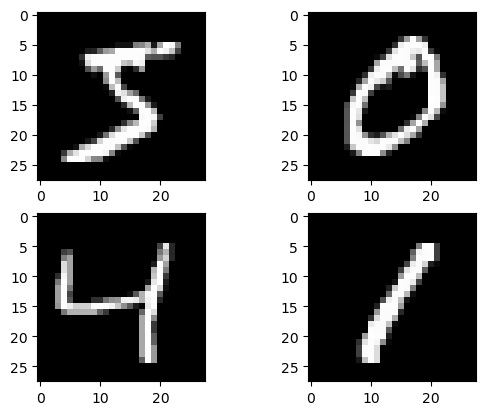

In [6]:

plt.subplot(221)
plt.imshow(x_train[0],cmap = 'gray')
plt.subplot(222)
plt.imshow(x_train[1],cmap = 'gray')
plt.subplot(223)
plt.imshow(x_train[2],cmap = 'gray')
plt.subplot(224)
plt.imshow(x_train[3],cmap = 'gray')
plt.show()

## Basic model

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [8]:
history = model.fit(x_train,y_train,epochs = 37)

Epoch 1/37
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5027 - accuracy: 0.8518
Epoch 2/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4376 - accuracy: 0.9004
Epoch 3/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3255 - accuracy: 0.9234
Epoch 4/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9330
Epoch 5/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2456 - accuracy: 0.9389
Epoch 6/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2240 - accuracy: 0.9435
Epoch 7/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2244 - accuracy: 0.9475
Epoch 8/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1970 - accuracy: 0.9535
Epoch 9/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1899 - accuracy: 0.9547
Epoch 10/37
1875/1875 [==============================] - 8s 4ms/step - loss: 0.198

In [9]:
v_loss,v_acc = model.evaluate(x_test,y_test)
print(v_loss,v_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.9547
0.5409368872642517 0.9546999931335449


## Model after Preprocessing 

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to have a single channel (MNIST images are grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


Epoch 1/10
422/422 [==============================] - 30s 67ms/step - loss: 0.3288 - accuracy: 0.8991 - val_loss: 0.0648 - val_accuracy: 0.9803
Epoch 2/10
422/422 [==============================] - 28s 66ms/step - loss: 0.1100 - accuracy: 0.9673 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 3/10
422/422 [==============================] - 28s 66ms/step - loss: 0.0807 - accuracy: 0.9765 - val_loss: 0.0407 - val_accuracy: 0.9892
Epoch 4/10
422/422 [==============================] - 27s 65ms/step - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.0363 - val_accuracy: 0.9890
Epoch 5/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 6/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 7/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0293 - val_accuracy:

In [11]:
scores = model.evaluate(x_test,y_test, verbose = 0)
print('acc:',scores[1])
print(scores)

acc: 0.9922999739646912
[0.024502817541360855, 0.9922999739646912]


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 2s 7ms/step - loss: 0.0245 - accuracy: 0.9923
Test accuracy: 0.9922999739646912
